In [120]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [121]:
#reading the data from the csv
customers = pd.read_csv("EcommerceCustomers.csv")
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [122]:
#info and describe
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [123]:
# describe
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


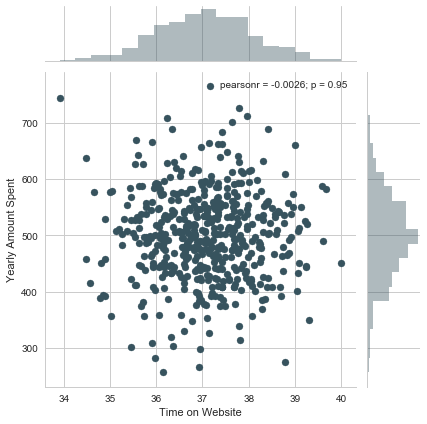

In [124]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

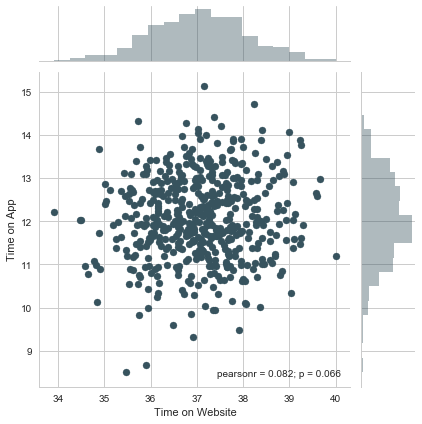

In [125]:
sns.jointplot(x='Time on Website',y='Time on App',data=customers)

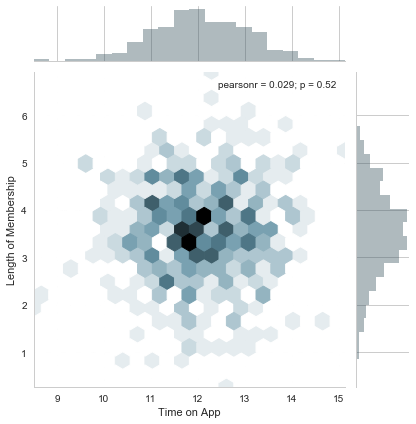

In [126]:
sns.jointplot(x='Time on App',y='Length of Membership',data=customers,kind='hex')

In [ ]:
sns.pairplot(customers)

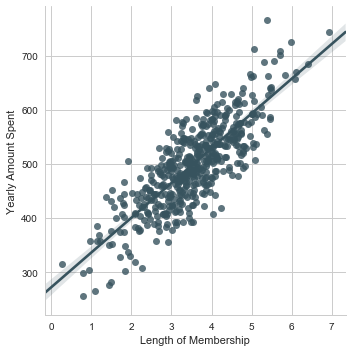

In [11]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

In [77]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [100]:
# getting data ready - features
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [109]:
# getting the target ready
y = customers['Yearly Amount Spent']
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [110]:
# split the data using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 

In [111]:
# perform training
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [112]:
# fit the model
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [113]:
# coefficients table
df = pd.DataFrame(lm.coef_)
df

,0
0,25.724256
1,38.597135
2,0.459148
3,61.674732


In [114]:
# predict the values of yearly amount spent
predictions = lm.predict( X_test)
predictions.shape

(150,)

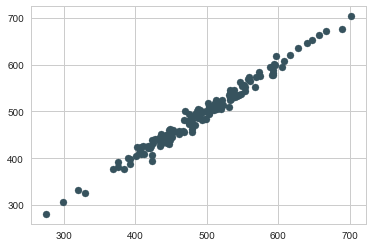

In [115]:
plt.scatter(y_test,predictions)

In [119]:
print("Predicted: ",predictions)
print("-----------------------------------------")
print("Actual: \n",  y_test)
print("-----------------------------------------")

Predicted:  [ 403.66993069  542.57756289  427.06591658  502.02460425  410.12143559
  569.93442508  531.93431341  506.29650969  408.71870658  473.97737105
  441.46912726  425.33703059  425.1297229   527.61676714  431.45684016
  424.0769184   575.76543296  484.89856554  458.35936863  481.96502182
  502.32441491  513.63783554  507.58877002  646.57464283  450.24372141
  496.27043415  556.40457807  554.95630839  399.64237199  325.84623136
  532.89783259  478.12238702  501.05701845  305.97335848  505.77244448
  483.79591969  518.8331528   438.18241857  456.71094234  471.04609461
  494.44008972  445.31155755  508.78802753  501.04594193  488.83499673
  535.38079541  595.20129802  514.04714872  280.76758312  433.10112367
  421.70823427  481.23640152  584.71372272  608.7748096   563.98513427
  494.72804869  394.52133407  456.4197529   573.08767515  499.6984241
  512.83277025  392.12434043  480.05057697  481.54520299  475.1117359
  546.2717533   430.85039085  602.16082001  422.3695128   493.57280

In [87]:
# Regression metrics
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.22814865343
MSE: 79.813051651
RMSE: 8.93381506698


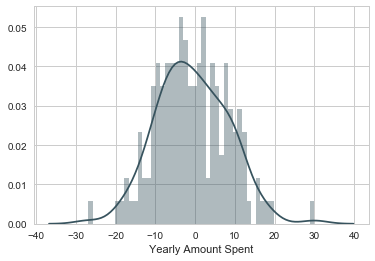

In [88]:
# Residuals
sns.distplot((y_test-predictions),bins=50);

In [89]:
coeffcients = pd.DataFrame(lm.coef_,X.columns)
coeffcients

,0
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
